# Project 2: Business Statistics: Axis Insurance

## Objectives – 
- Statistical Analysis of Business Data. Explore the dataset and extract insights from the data. 

- Explore the dataset and extract insights using Exploratory Data Analysis.
- Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? 
- Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
- Is the proportion of smokers significantly different across different regions? 
- Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.
    - *Consider a significance level of 0.05 for all tests.

### Data Dictionary –

-  Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- Sex - This is the policy holder's gender, either male or female.
- BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
- Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
- Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
- Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
- Charges​ - Individual medical costs billed to health insurance


In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import   ttest_1samp,ttest_ind
from statsmodels.stats.power import ttest_power


import seaborn as sns
sns.set_style("whitegrid") #to give a white grid for all plots

import warnings
warnings.filterwarnings('ignore') 

In [2]:
#Read csv file

AxisData = pd.read_csv('AxisInsurance.csv')

#copying to a different file
data = AxisData.copy()

In [3]:
# Exploring the first few rows of data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# shape of the data 
data.shape

(1338, 7)

- Age,bmi, Children and Charges are numerical (int) and needs to be changed to float
- Sex, Smoker and Region are objects
- Sex, Smoker and Region to be changed to categorical variables

In [6]:
# EDA
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Observations:
#### Numerical
- Mean of age, bmi, children, charges are greater than median and they are right skewed. 
- Although the age varies between 18 and 64, 75% of the customers are below 51.
- Claims of charges vary between 1121 and 63770 

#### Cateogorical
- 2 unique categories for sex and smoker
- 4 unique categories for region

In [9]:
#changing the datatype to category
cols_cat = ['sex', 'smoker', 'region']
data[cols_cat] = data[cols_cat].astype('category')

#verifying
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


- Sex, smoker and region are changed to categorical datatype.

## Checking for missing values

In [10]:
# checking if any values are missing
data.isnull().sum() # sum of the missing values in each column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Observations:
- No missing values 

In [12]:
# to find the skewness factor
data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

- All right skewed (>0)

## Exploratory Data Anlaysis

In [13]:
# univariate analysis - function- boxplot and histplot
def univariate_analysis_hist_box(plot_choose, figsize = (6,6), bins= None):
    f2, (ax_box1, ax_hist1) = plt.subplots(nrows = 2, sharex= True, gridspec_kw = {'height_ratios':(.3,.7)}, figsize=figsize)#subplots histogram and boxplots
    sns.boxplot(plot_choose, ax= ax_box1, showmeans = True, color = 'green') #boxplot
    sns.distplot(plot_choose, kde = False, ax= ax_hist1, bins= bins) #histogram
    ax_hist1.axvline(np.mean(plot_choose), color= 'red', linestyle=":") #histogram mean
    ax_hist1.axvline(np.median(plot_choose), color= 'blue', linestyle="-") #histogram median
    plt.rc('xtick', labelsize= 20) #x tick size
    plt.rc('ytick', labelsize=20) #ytick size
    ax_box1.xaxis.label.set_size(20)# x label size of boxplot
    ax_hist1.xaxis.label.set_size(20) #x label size of histogram

### Observations of 'age'

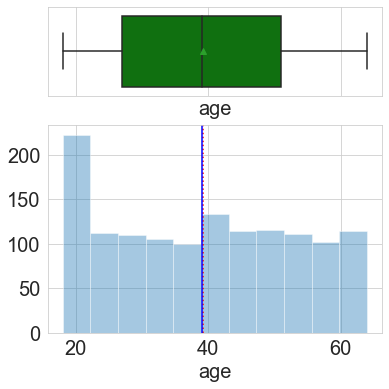

In [15]:
#age
univariate_analysis_hist_box(data['age']) 

### Observations:
- Slightly right skewed
- High number of customers who claimed the insurance, belong to age of 20

### Observations on bmi

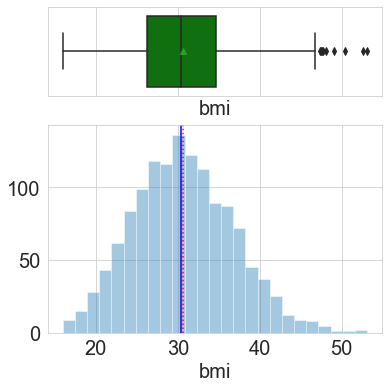

In [16]:
univariate_analysis_hist_box(data['bmi'])  #bmi

### Observations:
- Slightly right skewed
- Almost like a normal distribution
- Most number of customers have bmi around 30
- There are outliers
- There are very few customers with very low and very high bmi 
- As given by the data dictinary, an ideal bmi is between 18.5 to 24.9. Therefore, most of the customers that claimed the insurance bill are beyond the ideal bmi

### Observations on 'children'

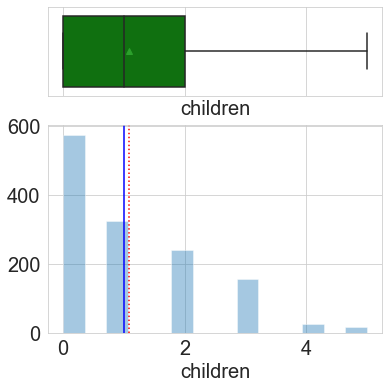

In [17]:
univariate_analysis_hist_box(data['children']) #children


## Observations:
- As per data dictionary, this indicated the number of children / dependents covered by the insurance plan.
- Slightly right skewed
- Highest count if for '0'. Therefore, most of the customers claimed for single person (no dependents)
- Lowest is for 5 children/dependents
- No outliers


### Observations of charges

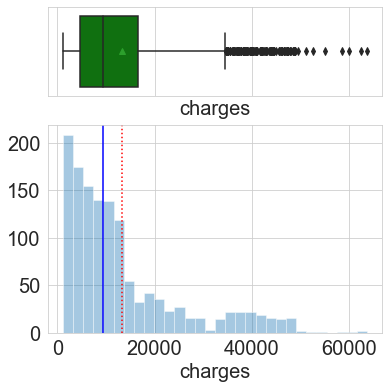

In [18]:
 univariate_analysis_hist_box(data.charges) #charges

### Observations

- Many outliers
- Right skewed
- Most of the customers claimed less charges
- From box plot, third quartile is around 16500, ie 75% of the customers claimed less than 16500 bill. 

## Univariate analysis on cateogorical variables

In [19]:
def univariate_analysis_bar(plot_choose):
    plt.figure(figsize=(10,6))
    ax = sns.countplot(plot_choose) #countplot
    
    col_tot = len(plot_choose) #total length of the column
    for per in ax.patches:
        percentage = '{:.2f}%'.format(100 * per.get_height()/col_tot) # to find the percentage in each individual category of the variable
        x = per.get_x() + per.get_width() / 2 -0.05 #width of the plot
        y = per.get_y() + per.get_height()          #height of the plot
        ax.annotate(percentage, (x,y), size =15) #annotate values-percentages on the bar plot
        
    plt.rc('xtick', labelsize=20) #size of x values
    plt.rc('ytick', labelsize=20) #size of y values
    ax.xaxis.label.set_size(20)# x label size of plot
    ax.yaxis.label.set_size(20)# y label size of plot
    

### Observations on 'sex'

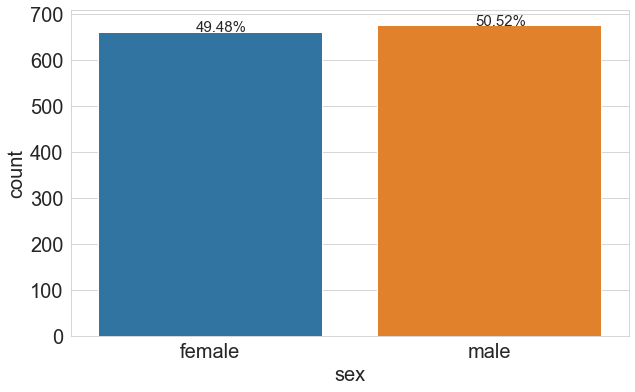

In [20]:
 univariate_analysis_bar(data.sex) #sex

### Observations:
- Slightly more males customers claim insurance bills compared to females

### Observations on 'smoker'

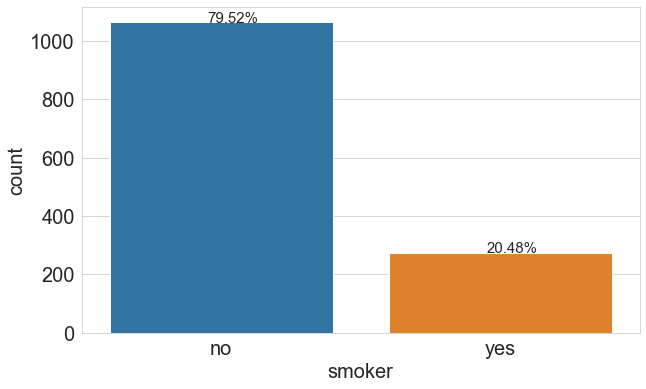

In [21]:
univariate_analysis_bar(data.smoker) #smoker

### Observations:
- Significantly more non-smokers (79.52%) claim insurance bills than smokers (20.48%)

### Observations on 'region'

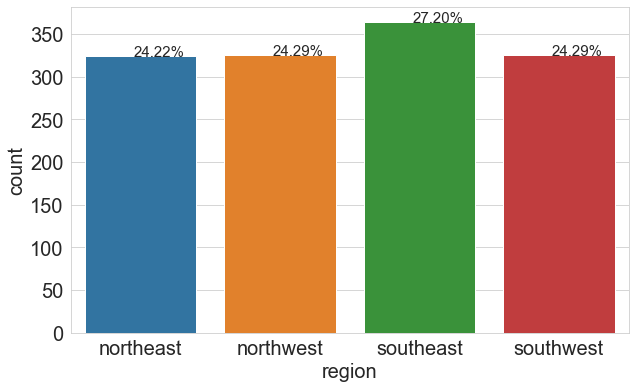

In [22]:
univariate_analysis_bar(data.region) #region

### Observations:
- There are customers from four regions- southeast, southwest, northwest and northeast
- Among the four different regions, customers who claimed insurance bills are more from southeast region (27.20%), followed by southwest and northwest (both 24.29%) and finally northeast with the least (24.22%)

### Observations on 'children'

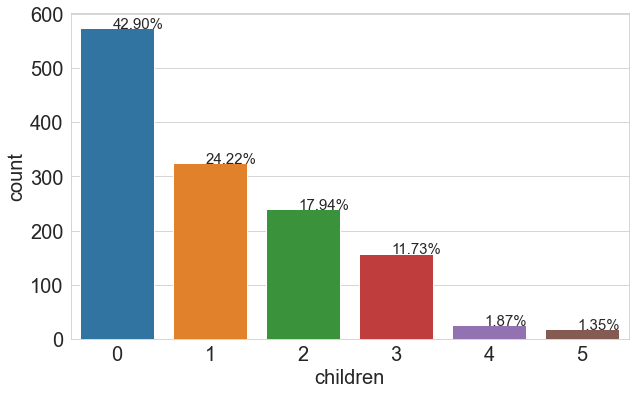

In [23]:
univariate_analysis_bar(data.children) #children

- 42.9% of the customers did not claim for dependents/children
- Only 1.35% claimed for 5 dependents/children
- Could it be due to the charges of the bills?

## Multivariate analysis

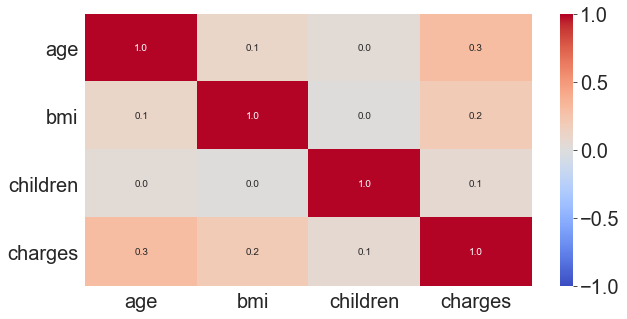

In [25]:
#heatmap of the data to understand the bivariate correlation
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), 
            annot=True,
            cmap='coolwarm',
        fmt=".1f", 
            vmin=-1,vmax=1)
plt.show() #.corr is the correlation index


- All variables are correlated positively
- The correlation index values are very low generally 
- BMI-charges, age-charges, age-BMI have correlation index>0.1
- The positive correlation between BMI-charges could indicate that if BMI is more (deviation from ideal bmi), they could probably be unhealthy and claim more bills. 
- The positive correlation between children-charges could indicate that charges can be more if more dependents/children are considered for the claim. 
- But the correlation is very low

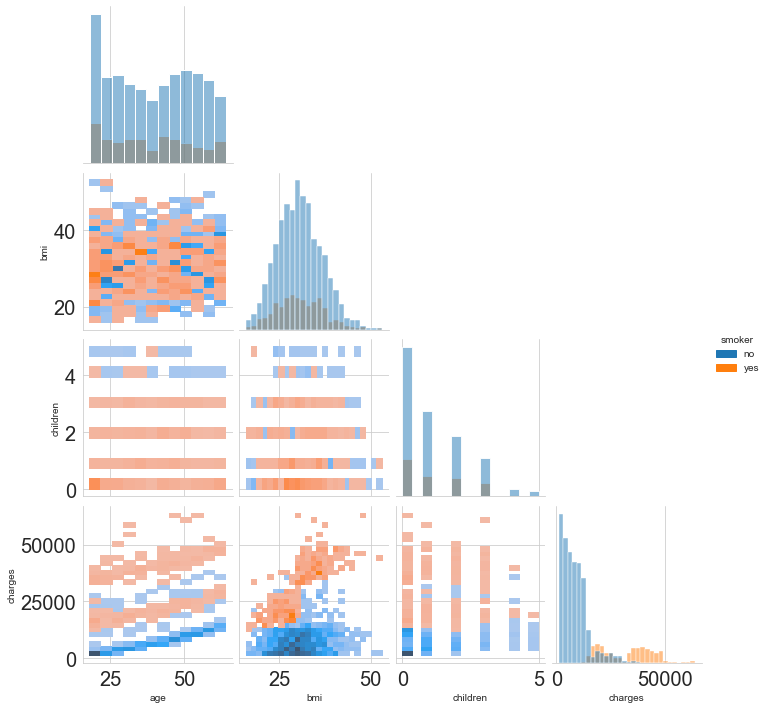

In [26]:
#pairplot of all numerical variables
sns.pairplot(data=data,hue="smoker",corner=True, kind='hist') #smoker and non-smoker data in different colour
plt.show()

### Observations
- The pairplot shows the correlations between variables for smokers and non-smokers. 
- There seems to be a difference, especially in charges, which needs further investigation


### Charges vs BMI vs Region

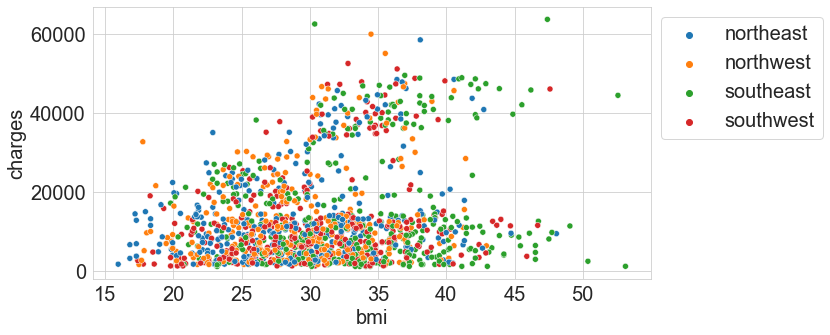

In [49]:
#scatter plot of Charges vs BMI vs Region
plt.figure(figsize=(10,5))
sns.scatterplot('bmi','charges',hue='region',data=data, marker='o') 
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('bmi',size=20)
plt.ylabel('charges',size=20)
plt.legend(bbox_to_anchor=(1.00, 1), fontsize=20)
plt.show()

- As mentioned before, it is a positive correlation. However, more analysis is required


### Smoker vs Age

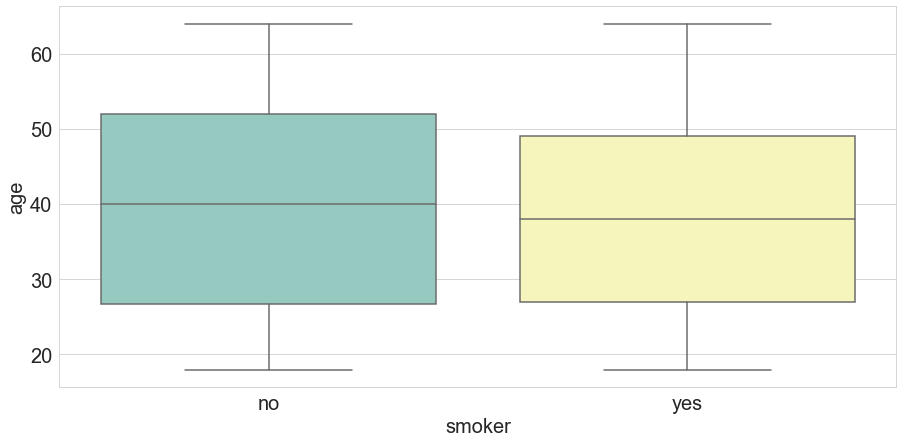

In [35]:
# box plot of smoker and age
plt.figure(figsize=(15,7))
sns.boxplot(data["smoker"],data["age"],palette="Set3") #boxplot
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('smoker',size=20) #xlabel 
plt.ylabel('age',size=20) #ylabel
plt.show() 

- Most of the smokers who claim bills are of age group 28-50, while most of the non-smokers who claim are of age group 27-52

### Smoker vs Charges

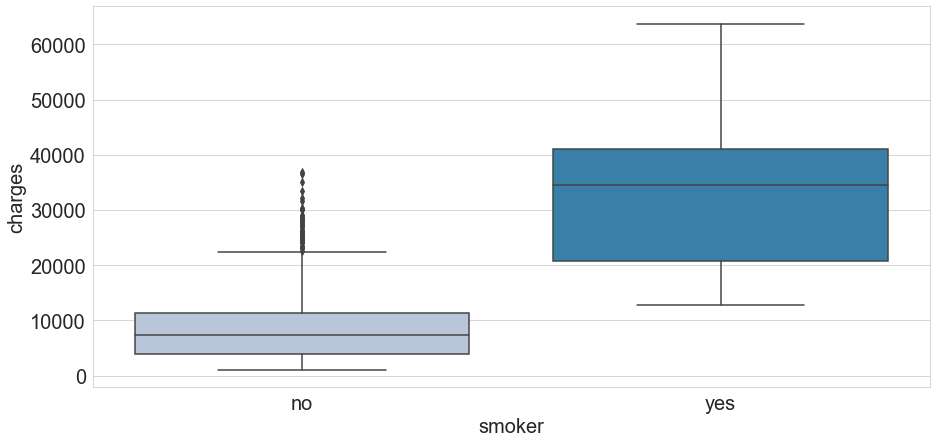

In [36]:
#box plot of smoker and charges
plt.figure(figsize=(15,7))
sns.boxplot(data["smoker"],data["charges"],palette="PuBu")
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('smoker',size=20) #xlabel 
plt.ylabel('charges',size=20) #ylabel
plt.show()

- Most of the smokers claim significantly more bills than non-smokers
- Most of the smokers claim between 22000 and 40000, while most of the non-smokers claim between 5000 and 11000

### BMI vs Sex

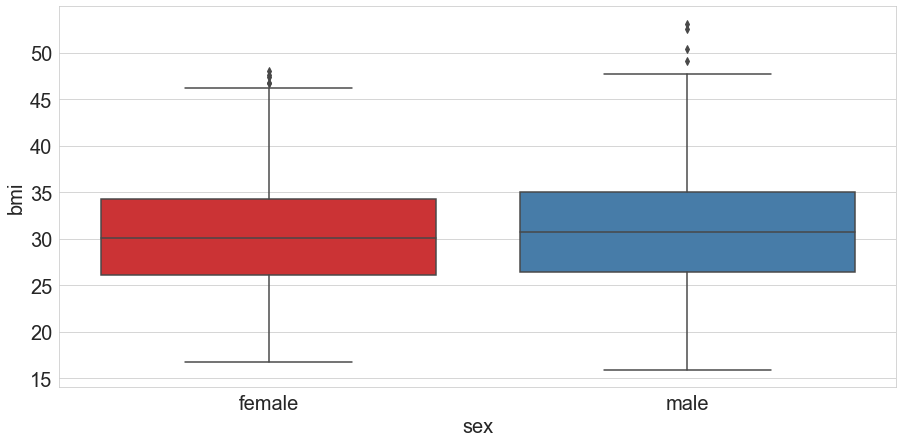

In [37]:
# bmi and sex
plt.figure(figsize=(15,7))
sns.boxplot(data["sex"],data["bmi"],palette="Set1")
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('sex',size=20) #xlabel 
plt.ylabel('bmi',size=20) #ylabel
plt.show()

- BMI levels of females falls slightly below that of males. However, further investigation is needed to find out if this is statistically significant

### Age vs BMI

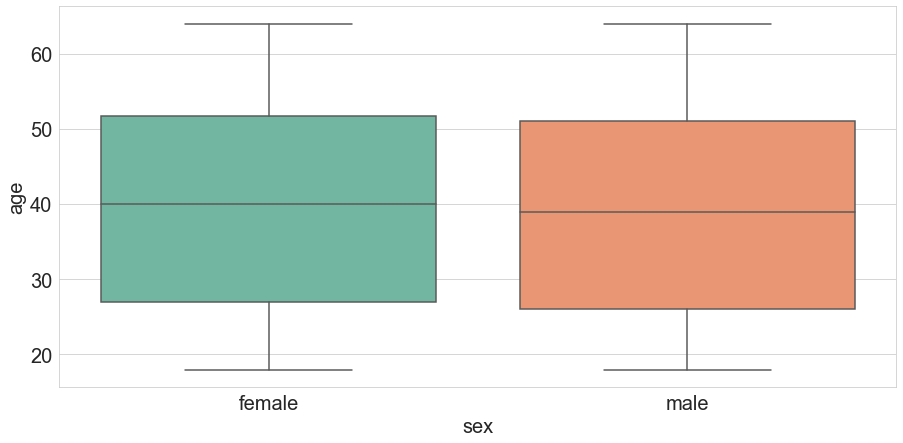

In [38]:
# box plot of sex and age
plt.figure(figsize=(15,7))
sns.boxplot(data["sex"],data["age"],palette="Set2")
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('sex',size=20) #xlabel 
plt.ylabel('age',size=20) #ylabel
plt.show()

- Both male and female customers who claim the insurance are of almost similar age group with slight males slightly lower

### Smoker vs Children

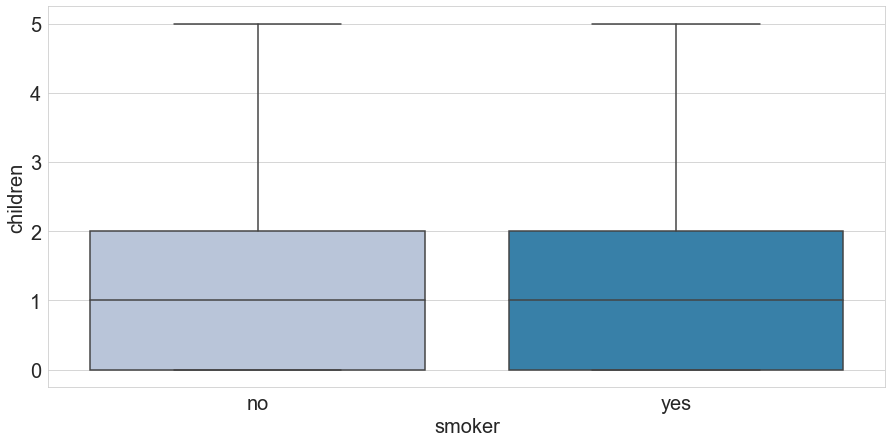

In [39]:
#box plot of smoker and children

plt.figure(figsize=(15,7))
sns.boxplot(data["smoker"],data["children"],palette="PuBu")
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('smoker',size=20) #xlabel 
plt.ylabel('children',size=20) #ylabel
plt.show()

### Children vs Sex

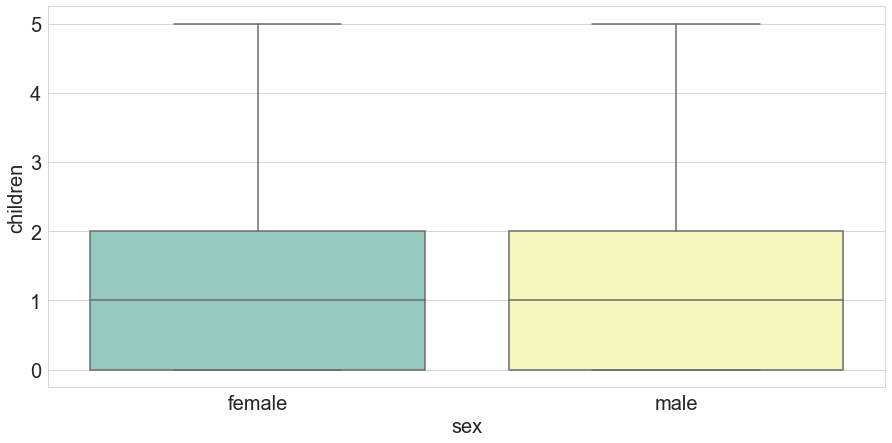

In [40]:
#bokxplot of sex and children
plt.figure(figsize=(15,7))
sns.boxplot(data["sex"],data["children"],palette="Set3")
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('sex',size=20) #xlabel 
plt.ylabel('children',size=20) #ylabel
plt.show()

- Both male and female customers who claim insurance have claimed bills for dependents/children in the similar range

### Sex vs Charges

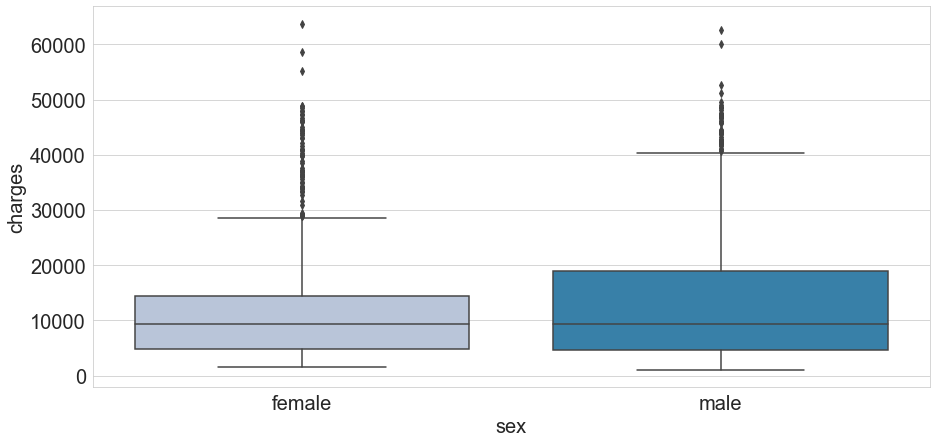

In [41]:
#box plot of sex and charges
plt.figure(figsize=(15,7))
sns.boxplot(data["sex"],data["charges"],palette="PuBu")
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('sex',size=20) #xlabel 
plt.ylabel('charges',size=20) #ylabel
plt.show()

- In addition, male customers have claimed more charges than females


### Smoker vs Sex

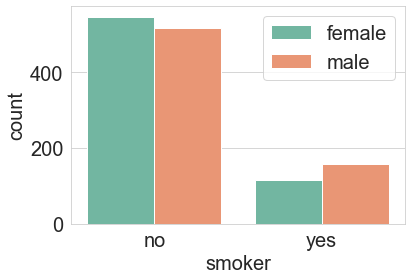

In [45]:
#count plot of smoker and sex
sns.countplot(data['smoker'], hue = data['sex'],palette='Set2')
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('smoker',size=20) #xlabel 
plt.ylabel('count',size=20) #ylabel
plt.legend(fontsize=20)

- There are more male smokers than females
- There are more Female non-smokers than males

### Sex vs Charges vs Smoker

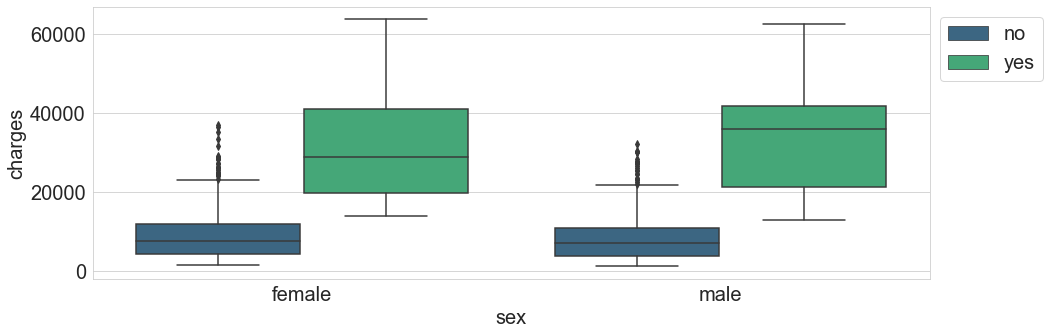

In [48]:
#box plot of Sex vs Charges vs Smoker
plt.figure(figsize=(15,5))
sns.boxplot(data["sex"],data["charges"],hue=data["smoker"],palette="viridis")
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('sex',size=20) #xlabel 
plt.ylabel('charges',size=20) #ylabel
plt.legend(bbox_to_anchor=(1.00, 1), fontsize=20)
plt.show()

- Female non-smokers claim more charges than male non-smokers
- Male customers who smoke claim more charges than female customers
- Need to check if they are statistically significant

### Region vs Charges vs Smoker

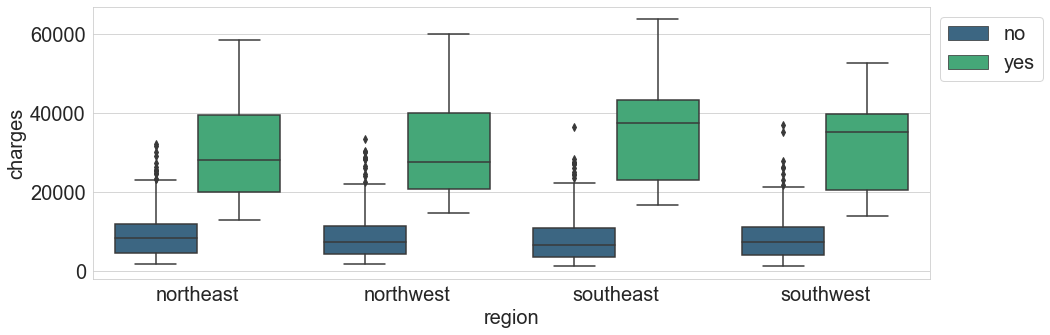

In [51]:
# box plot of Region vs Charges vs Smoker
plt.figure(figsize=(15,5))
sns.boxplot(data["region"],data["charges"],hue=data["smoker"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1), fontsize=20)
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('region',size=20) #xlabel 
plt.ylabel('charges',size=20) #ylabel
plt.show()

- Charges claimed from southeast are higher than from other regions. Can this be due to higher hospital bills in southeast region ? Or BMI levels?
- Charges claimed by smokers are different regions. However, not so evidently different in the case of non-smokers across regions

### Region vs Charges vs Sex

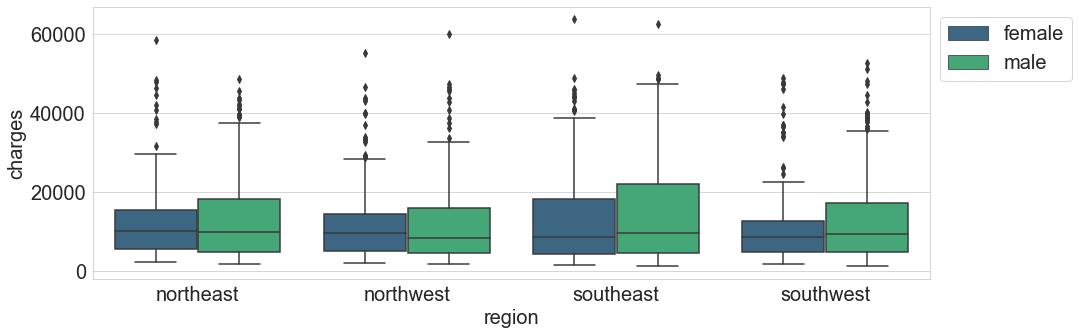

In [53]:
# box plot of Region vs Charges vs Sex
plt.figure(figsize=(15,5))
sns.boxplot(data["region"],data["charges"],hue=data["sex"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1), fontsize=20)
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('region',size=20) #xlabel 
plt.ylabel('charges',size=20) #ylabel
plt.show()

- Charges claimed by both male and female are different across regions 
- Maximum charges claimed by male customers from southeast

### Children vs Charges vs Smoker

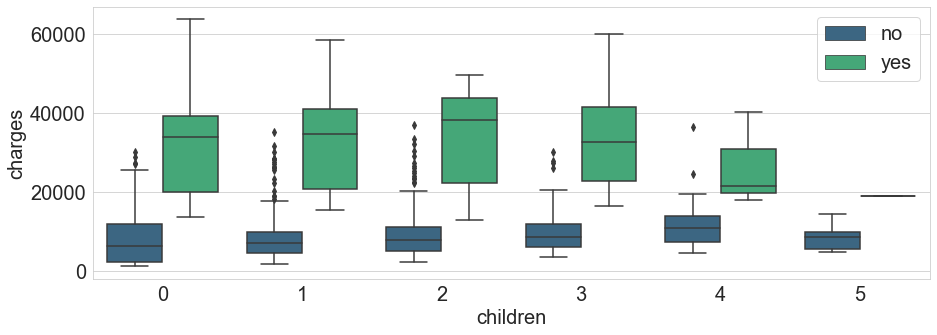

In [55]:
#box plot of Children vs Charges vs Smoker
plt.figure(figsize=(15,5))
sns.boxplot(data["children"],data["charges"],hue=data["smoker"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1), fontsize=20)
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('children',size=20) #xlabel 
plt.ylabel('charges',size=20) #ylabel
plt.show()

- Charges claimed by both non-smokers smokers vary with difference in number of children/dependents
- Lowest charge filed by customers with higher number of dependents
- Charges are claimed more by smokers

### Children vs Charges vs Sex

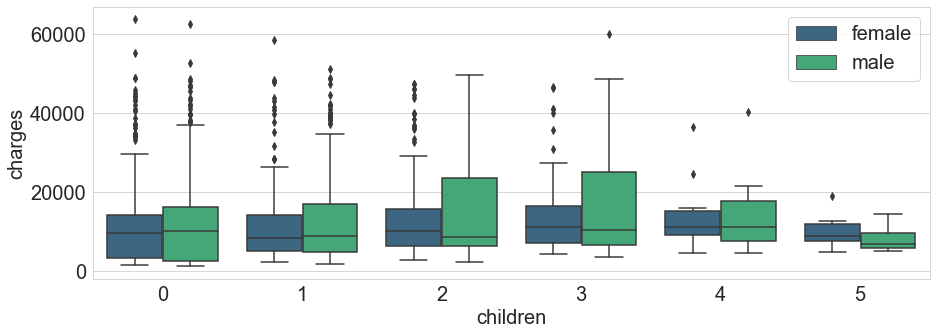

In [56]:
#box plot of Children vs Charges vs Sex
plt.figure(figsize=(15,5))
sns.boxplot(data["children"],data["charges"],hue=data["sex"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1), fontsize=20)
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('children',size=20) #xlabel 
plt.ylabel('charges',size=20) #ylabel
plt.show()

- In all cases except for 5 children/dependents, male customers claimed more charges than female customers

### Children vs Age vs Smoker

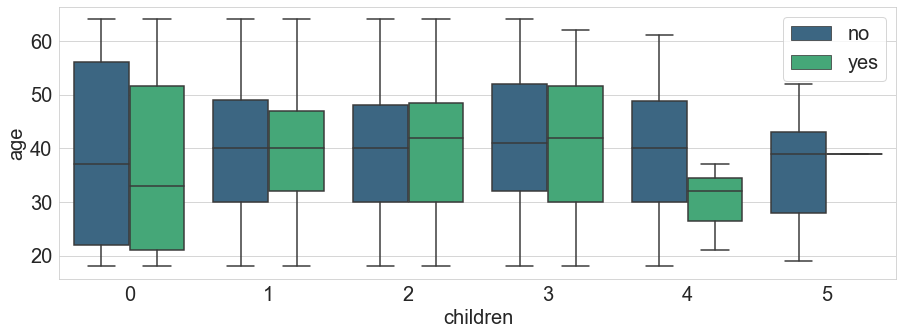

In [57]:
#box plot of Children vs Age vs Smoker
plt.figure(figsize=(15,5))
sns.boxplot(data["children"],data["age"],hue=data["smoker"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1), fontsize=20)
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('children',size=20) #xlabel 
plt.ylabel('age',size=20) #ylabel
plt.show()

- Not many claims from below 30 age group people

### Region vs Age vs Smoker

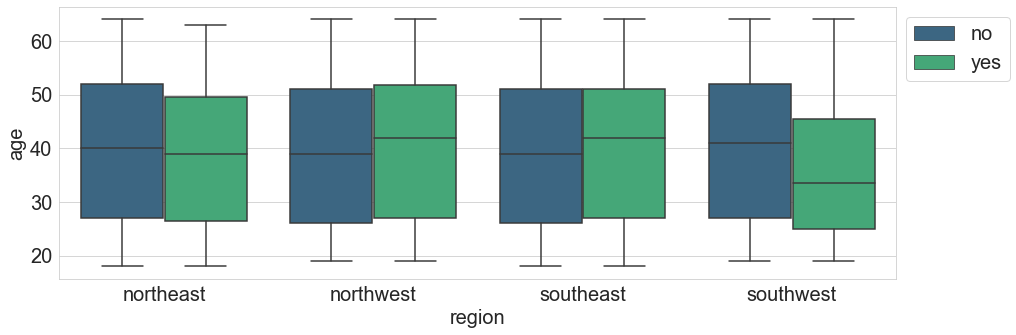

In [58]:
#box plot of Region vs Age vs Smoker
plt.figure(figsize=(15,5))
sns.boxplot(data["region"],data["age"],hue=data["smoker"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1), fontsize=20)
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('region',size=20) #xlabel 
plt.ylabel('age',size=20) #ylabel
plt.show()

- Not much difference for customer age across regions for smokers and non-smokers except for southwest region
- In southwest region, about 50% of smokers are of age group below 32 

### Region vs BMI vs Sex

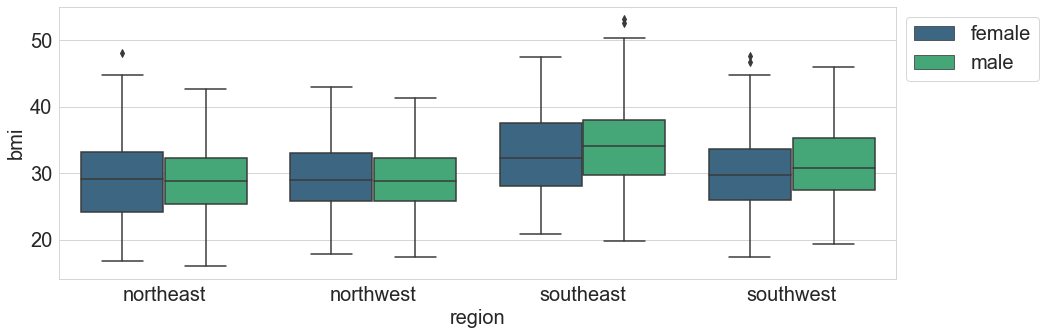

In [60]:
#box plot of Region vs BMI vs Sex
plt.figure(figsize=(15,5))
sns.boxplot(data["region"],data["bmi"],hue=data["sex"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1), fontsize=20)
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('region',size=20) #xlabel 
plt.ylabel('bmi',size=20) #ylabel
plt.show()

- BMI varies across region, customers from southeast has highest bmi. 
- May be this is the reason for the charges being higher in this region

### BMI vs Region vs Smoker

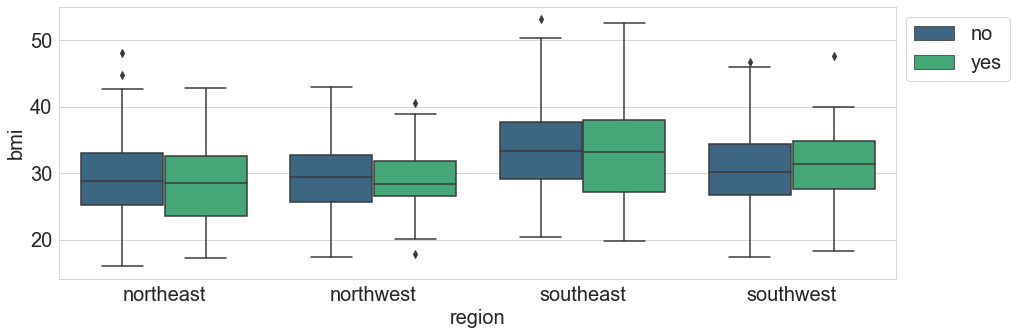

In [62]:
#box plot of BMI vs Region vs Smoker
plt.figure(figsize=(15,5))
sns.boxplot(data["region"],data["bmi"],hue=data["smoker"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1), fontsize=20)
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values
plt.xlabel('region',size=20) #xlabel 
plt.ylabel('bmi',size=20) #ylabel
plt.show()

- BMI of both smokers and non-smokers from southeast are higher than others

### Age vs Children vs Sex, Region and Smoker

In [73]:
cols = ['sex', 'region', 'smoker']
print(range(len(cols)))
data[cols]

range(0, 3)


,sex,region,smoker
0,female,southwest,yes
1,male,southeast,no
2,male,southeast,no
3,male,northwest,no
4,male,northwest,no
...,...,...,...
1333,male,northwest,no
1334,female,northeast,no
1335,female,southeast,no
1336,female,southwest,no


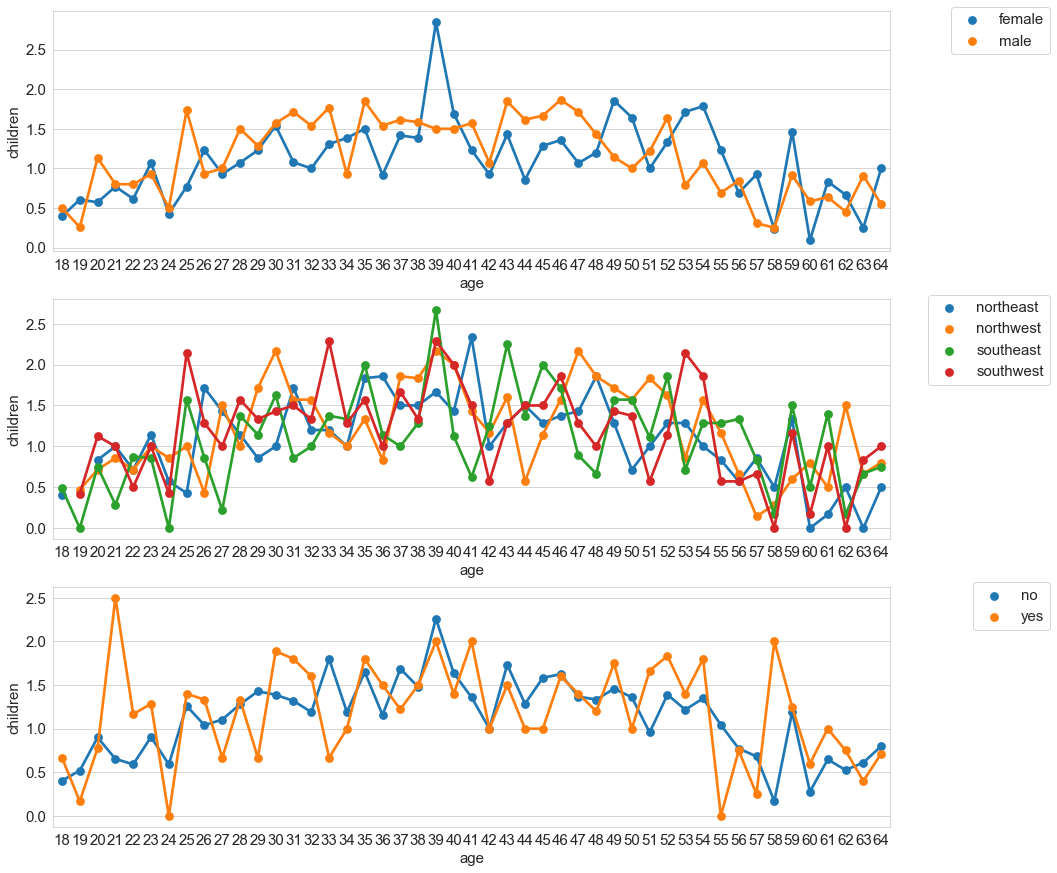

In [105]:
# 3 subplots of Age vs Children vs Sex, Region and Smoker
plt.figure(figsize=(15,15))

cols = ['sex', 'region', 'smoker']
count=1
for i in range(len(cols)):
    plt.subplot(3,1,count)
    sns.pointplot(data["age"],data["children"],hue=data[cols[i]],ci=0)
    plt.legend(bbox_to_anchor=(1.2, 1.05), fontsize=15)
    plt.rc('xtick', labelsize=15) #size of x values
    plt.rc('ytick', labelsize=15) #size of y values
    plt.xlabel('age',size=15) #xlabel 
    plt.ylabel('children',size=15) #ylabel
    count=count+1

plt.show()

- Highest number of children/dependents is in the age group 39-41

### Age vs Charges vs Smoker

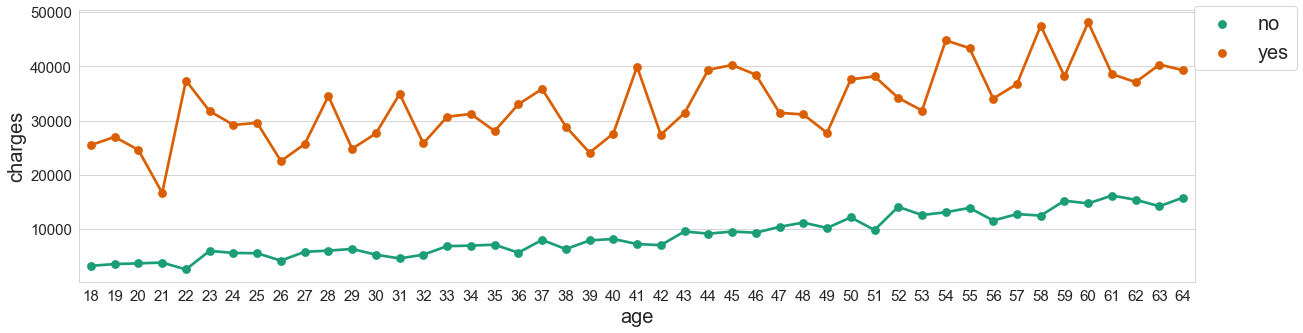

In [104]:
#point plot of age vs charges vs smoker
plt.figure(figsize=(20,5))
sns.pointplot(data["age"],data["charges"],hue=data["smoker"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.1, 1.05), fontsize=20)
plt.rc('xtick', labelsize=15) #size of x values
plt.rc('ytick', labelsize=15) #size of y values
plt.xlabel('age',size=20) #xlabel 
plt.ylabel('charges',size=20) #ylabel
plt.show()

- As age increased, charges increased for both smokers and non-smokers. However, more charges claimed by smokers

### Age vs BMI vs Sex

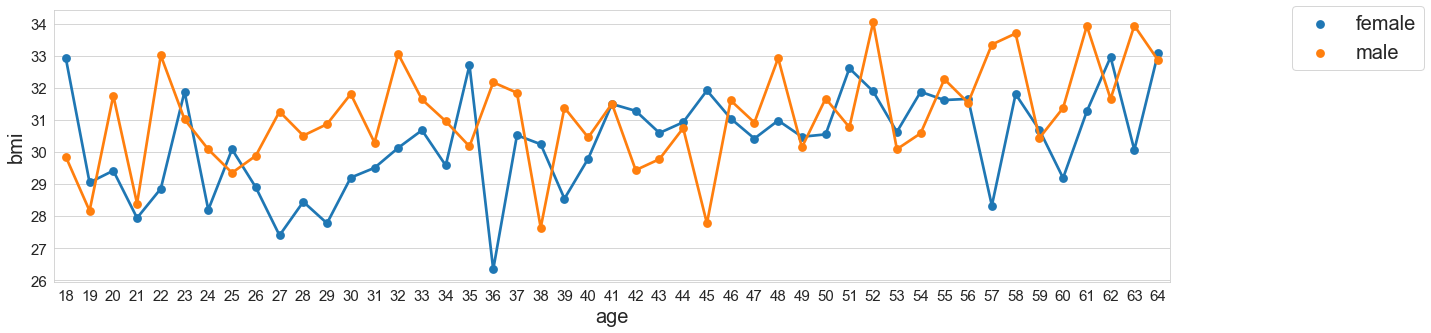

In [108]:
#point plot of Age vs BMI vs Sex
plt.figure(figsize=(20,5))
sns.pointplot(data["age"],data["bmi"],hue=data["sex"],ci=0)
plt.legend(bbox_to_anchor=(1.1, 1.05), fontsize=20)
plt.rc('xtick', labelsize=15) #size of x values
plt.rc('ytick', labelsize=15) #size of y values
plt.xlabel('age',size=20) #xlabel 
plt.ylabel('bmi',size=20) #ylabel
plt.show()

- Not much difference in the BMI levels of male and female customers across different age values

### Children vs Charges vs BMI and Sex

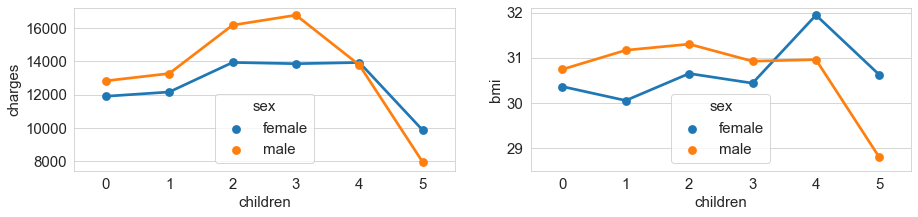

In [133]:
#point plot of Children vs Charges vs BMI and Sex
plt.figure(figsize=(15,3))

cols = ['charges', 'bmi']
count=1
for i in range(len(cols)):
    plt.subplot(1,len(cols),count)
    sns.pointplot(data["children"],data[cols[i]],hue=data['sex'],ci=0)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.legend(title='sex', title_fontsize=15, fontsize=15)
    plt.rc('xtick', labelsize=15) #size of x values
    plt.rc('ytick', labelsize=15) #size of y values
    plt.xlabel('children',size=15) #xlabel 
    plt.ylabel(cols[i],size=15) #ylabel
    count=count+1
plt.show()

- As the number of dependents/children increases the charges increases and there is a dip at 5 dependents
- The plot is similar to bmi vs children
- BMI also reduced drastically for males with 5 dependents than for female with 5 dependents. Lower BMI levels might have reduced their bills

### Children vs Charges vs Smoker and BMI

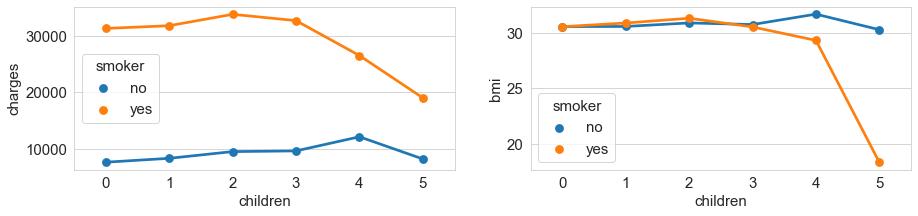

In [131]:
# point plot of Children vs Charges vs BMI and Smoker

plt.figure(figsize=(15,3))

cols = ['charges', 'bmi']
count=1
for i in range(len(cols)):
    plt.subplot(1,len(cols),count)
    sns.pointplot(data["children"],data[cols[i]],hue=data['smoker'],ci=0)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.legend(title='smoker', title_fontsize=15, fontsize=15)
    plt.rc('xtick', labelsize=15) #size of x values
    plt.rc('ytick', labelsize=15) #size of y values
    plt.xlabel('children',size=15) #xlabel 
    plt.ylabel(cols[i],size=15) #ylabel
    count=count+1
plt.show()

- Charges claimed by smokers are higher than non-smokers
- Smokers with 5 dependents have very low BMI levels as compared to less than 5 dependents. Again lower BMI levels might have reduced the charges

## Hypothesis testing

### 1. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?


- Null hypothesis, Ho = The claims made by smokers is less than or equal to non-smokers
- Alternate hypothesis, Ha = The claims made by smokers greater than non-smokers 





In [144]:
# The objective is to prove the medical claims by people who smoke is greater than those don't
# So we extract the data of charges for smokers and non-smokers separately

data_smokers = data[data['smoker'] == 'yes'] #data of smokers
data_nonsmokers = data[data['smoker'] == 'no']# data of non-smokers

n_smokers = data.smoker.value_counts()[1]# number of smokers in the data
n_nonsmokers = data.smoker.value_counts()[0] #number of non-smokers in the data

charges_smokers_mean=data_smokers.charges.mean() #mean of charges of smokers
charges_nonsmokers_mean=data_nonsmokers.charges.mean() #mean of charges of non-smokers
charges_smokers=data_smokers.charges #charges data of smokers
charges_nonsmokers=data_nonsmokers.charges #charges data of non-smokers


#data_smoker
print('Number of smokers and non-smokers in the data are {} ({}%) and {} ({}%) respectively'.format(n_smokers, round((n_smokers/(n_smokers+n_nonsmokers)),2)*100, n_nonsmokers, round((n_nonsmokers/(n_smokers+n_nonsmokers)),2)*100))
print(f'Proportion of smokers to non-smokers in data = {round(n_smokers/n_nonsmokers,2)}')

Number of smokers and non-smokers in the data are 274 (20.0%) and 1064 (80.0%) respectively
Proportion of smokers to non-smokers in data = 0.26


In [145]:
n_nonsmokers = data.smoker.value_counts() #smoker count
n_nonsmokers #number of smokers and non-smokers

no     1064
yes     274
Name: smoker, dtype: int64

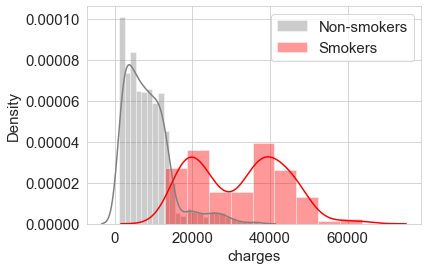

In [152]:
#plotting the histogram of smoker and non-smoker charges
sns.distplot(data_nonsmokers.charges,color="grey",label='Non-smokers')
sns.distplot(data_smokers.charges,color="red",label='Smokers')
plt.legend(bbox_to_anchor=(1, 1), fontsize=15) #legend
plt.rc('xtick', labelsize=15) #size of x values
plt.rc('ytick', labelsize=15) #size of y values
plt.xlabel('charges',size=15) #xlabel 
plt.ylabel('Density',size=15) #ylabel
plt.show()

In [153]:
#charges of smokers
charges_smokers

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [154]:
# checking if variances are same 
charges_smokers.var(),charges_nonsmokers.var()

(133207311.20634921, 35925420.49611172)

- Variances are different 

In [155]:
#We use the mean of charges of smokers and non-smokers and input into ttest_ind(), the independent t-test for 2 sample means
#Since variances are not the same, we input the False condition

#calculating the test statistic and pvalue 
t_statistic, p_value = ttest_ind(charges_smokers,charges_nonsmokers,equal_var=False) #equal_var=False because the variances are different
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: 32.751887766341824 p value: 5.88946444671698e-103 


In [156]:
# P-value for a one-tailed test is :p-value/2

print('t-stat and p-value for this one-tailed test=',t_statistic,p_value/2)
if p_value/2<0.05:
    print('Reject null hypothesis')
else:
    print("Fail to reject the null hypothesis")

t-stat and p-value for this one-tailed test= 32.751887766341824 2.94473222335849e-103
Reject null hypothesis


### Conclusions on the hypothesis
- Since p <0.05, we reject the null hypothesis
- The charges claimed by smokers are greater than the charges claimed by non-smokers, within the level of significance alpha =0.05



### 2. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
- Null hypothesis, H0=BMI of females and BMI of males are equal.i.e., µ1-µ2=0
- Alternate hypothesis, Ha=BMI of females and BMI of males are not equal.i.e., µ1-µ2 not equal to 0

In [162]:
#The objective is to prove or disprove that the BMI of females is different from that of males.
# So, we extract the data of male and female customers and then the BMI levels of each

data_female = data[data['sex'] == 'female'] #number of female customers
data_male = data[data['sex'] == 'male']# number of male customers
n_female = data.sex.value_counts()[1]# number of smokers in the data
n_male = data.sex.value_counts()[0] #number of non-smokers in the data

print('Number of males and females in the data are {} ({}%) and {} ({}%) respectively'.format(n_male, round((n_male/(n_male+n_female)),2)*100, n_female, round((n_female/(n_male+n_female)),2)*100))

Number of males and females in the data are 676 (51.0%) and 662 (49.0%) respectively


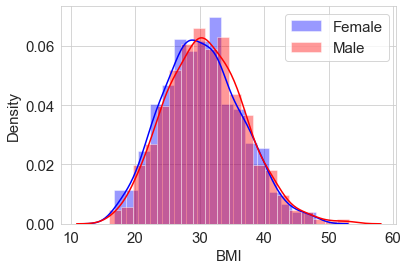

In [164]:
# histogram of BMI of female and male customers

sns.distplot(data_female.bmi,color="blue",label='Female')
sns.distplot(data_male.bmi,color="red",label='Male')
plt.legend(bbox_to_anchor=(1, 1), fontsize=15) #legend
plt.rc('xtick', labelsize=15) #size of x values
plt.rc('ytick', labelsize=15) #size of y values
plt.xlabel('BMI',size=15) #xlabel 
plt.ylabel('Density',size=15) #ylabel
plt.show()

In [165]:
#mean values of BMI of female and male
data_female.bmi.mean(),data_male.bmi.mean() #mean bmi values of female and male

(30.377749244713023, 30.943128698224832)

In [166]:
#checking if variances are the same
data_female.bmi.var(),data_male.bmi.var()

(36.554395153365576, 37.70493727081969)

- variances are different

In [169]:
#We use the mean of BMI of male and female and input into ttest_ind(), the independent t-test for 2 sample means
#Since variances are not the same, we input the False condition


#calculating the test statistic and pvalue 
t_statistic, p_value = ttest_ind(data_female.bmi,data_male.bmi,equal_var=False) #different variances
print('One-tailed sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))
if p_value<0.05:
    print('Reject null hypothesis')
else:
    print("Fail to reject the null hypothesis")

One-tailed sample t test 
t statistic: -1.697027933124022 p value: 0.08992430667834876 
Fail to reject the null hypothesis


### Conclusions on the hypothesis testing:
- Since p=0.089>0.05, we fail to reject Null hypothesis. 
- There is not enough evidence to say that BMI of female is different from male, within the level of significance alpha =0.05

### 3. Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]

- Null hypothesis, H0: proportion of smokers are equal across different regions
- Alternate hypothesis, Ha: proportion of smokers are not equal across different regions

In [173]:
# The objective is to prove or disprove the proportion of smokers significantly different across different regions
# To extract the proportion of smokers in each region
# So, we extract the number of smokers in each region and divide it individually by the count of customers (population) of each region


data_smokers #data for only smokers
data_nonsmokers #data extracted for only non-smokers

# calculate the number of customers in each region
n_northeast=data['region']=='northeast' #region=northeast. data is extracted for northeast region
n_northeast=n_northeast.value_counts()[1] #number of customers of northease region are counted

#similarly number of customers of each region is counted
n_southeast=data['region']=='southeast' #region=southeast
n_southeast=n_southeast.value_counts()[1]

n_northwest=data['region']=='northwest' #region=northwest
n_northwest=n_northwest.value_counts()[1]

n_southwest=data['region']=='southwest' # region=southwest
n_southwest=n_southwest.value_counts()[1]

# calculate the number of smokers in each region

n_smoker_northeast=data_smokers['region']=='northeast'
n_smoker_northeast=n_smoker_northeast.value_counts()[1]

n_smoker_southeast=data_smokers['region']=='southeast'
n_smoker_southeast=n_smoker_southeast.value_counts()[1]

n_smoker_northwest=data_smokers['region']=='northwest'
n_smoker_northwest=n_smoker_northwest.value_counts()[1]

n_smoker_southwest=data_smokers['region']=='southwest'
n_smoker_southwest=n_smoker_southwest.value_counts()[1]


print("Population in Northwest, northeast, southwest and southeast are respectively " ,
      n_northwest,n_northeast,n_southwest,n_southeast) #display the count of customers in each region
print("Count of smokers in Northwest, northeast, southwest and southeast are respectively " ,
      n_smoker_northwest,n_smoker_northeast,n_smoker_southwest,n_smoker_southeast) #display the count of smokers each region
print(f"Proportions of smokers in each regions:northwest={round(n_smoker_northwest/n_northwest,2)}, northeast={round(n_smoker_northeast/n_northeast,2)}, southwest={round(n_smoker_southwest/n_southwest,2)} and southeast={round(n_smoker_southeast/n_southeast,2)}")



Population in Northwest, northeast, southwest and southeast are respectively  325 324 325 364
Count of smokers in Northwest, northeast, southwest and southeast are respectively  58 67 58 91
Proportions of smokers in each regions:northwest=0.18, northeast=0.21, southwest=0.18 and southeast=0.25


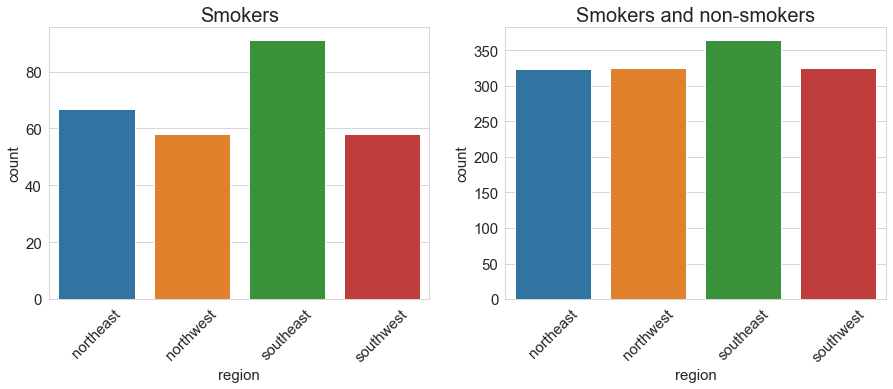

In [201]:
#count plot showing the number of customers in each region and number of smokers in each region
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data_smokers['region']) #number of smokers in each region
plt.title('Smokers', fontsize=20)

plt.rc('xtick', labelsize=15) #size of x values
plt.xticks(rotation=45)
plt.rc('ytick', labelsize=15) #size of y values
plt.xlabel('region',size=15) #xlabel 
plt.ylabel('count',size=15) #ylabel

plt.subplot(1,2,2)
sns.countplot(data['region']) #number of customers (smokers and non-smokers) in each region
plt.title('Smokers and non-smokers', fontsize=20)

plt.rc('xtick', labelsize=15) #size of x values
plt.xticks(rotation=45)
plt.rc('ytick', labelsize=15) #size of y values
plt.xlabel('region',size=15) #xlabel 
plt.ylabel('count',size=15) #ylabel

plt.show()



In [200]:
#smoker and region are categorical variables, therefore, we use chisquare test to analyse the hypothesis
# a chi-square test is run to analyse the hypothesis.

from scipy.stats import chi2_contingency
# obs = np.array([[n_smoker_northwest,n_smoker_northeast,n_smoker_southwest,n_smoker_southeast], [n_northwest,n_northeast,n_southwest,n_southeast]])
obs = np.array([[n_northwest,n_northeast,n_southwest,n_southeast],
                [n_smoker_northwest,n_smoker_northeast,n_smoker_southwest,n_smoker_southeast]]) #observation set contains the number of smokers in each region and total number of customers in each region


chi2,p_value,dof,expected=chi2_contingency(obs) #chi2, p-value, dof and expected dataset is calculated using chi2_contingency() function
print("p-value=",p_value) #display p-value

if p_value<0.05:
    print('Reject null hypothesis')
else:
    print("Fail to reject the null hypothesis")

p-value= 0.18873735884287562
Fail to reject the null hypothesis


In [194]:
#2 this is another way to express the above data
crosstab=pd.crosstab(data['smoker'],data['region'])
crosstab

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [195]:
#chi2 test with crosstab
from scipy.stats import chi2_contingency


chi2,p_value,dof,expected=chi2_contingency(crosstab) #chi2, p-value, dof and expected dataset is calculated using chi2_contingency() function
print("p-value=",p_value) #display p-value

if p_value<0.05:
    print('Reject null hypothesis')
else:
    print("Fail to reject the null hypothesis")

p-value= 0.06171954839170547
Fail to reject the null hypothesis


### Conclusion on hypothesis testing
- Since p>0.5, we fail to reject the null hypothesis. 
- There is no enough evidence to say that the proportion of smokers are different across different regions, within the level of significance alpha =0.05

### 4. Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

In [63]:
#Extracting and calculating the data of female customers with no children, one child and two children
female_0=data[data['children']==0].sex.value_counts()[1]
female_1=data[data['children']==1].sex.value_counts()[1]
female_2=data[data['children']==2].sex.value_counts()[1]
female_0,female_1,female_2

(285, 158, 119)

In [209]:
data_female['children']==0

0       True
1       True
2      False
3      False
4       True
       ...  
657    False
658     True
659     True
660     True
661     True
Name: children, Length: 662, dtype: bool

- Null hypothesis, H0: BMI of women with no children, one child, and two children are the same
- Alternate hypothesis, Ha: BMI of women with no children, one child, and two children are not the same

In [206]:
#Extracting and calculating the data of female customers with no children, one child and two children

data_female=data[data['sex']=='female'].reset_index() #Extracting the data for female customers

child_0=data_female[data_female['children']==0].reset_index() #extracting the data for female customers with no children
child_1=data_female[data_female['children']==1].reset_index() #extracting the data for female customers with one child
child_2=data_female[data_female['children']==2].reset_index() #extracting the data for female customers with two children

# print(child_0.count(),child_1.count(),child_2.count())
# child_1=data[data['children']==1]
# child_2=data[data['children']==2]

child_bmi=pd.DataFrame([child_0.bmi,child_1.bmi,child_2.bmi]).T #creating a new dataframe with the bmi values of female customers with no child, one child and two children
# header = child_bmi.loc[1]

# female_child_0=child_0[['sex']=='female']
# female_child_1=child_0[['sex']=='female'].count()
# female_child_2=child_0[['sex']=='female'].count()
# female_child_0
child_bmi.columns = ['bmi_child_0', 'bmi_child_1', 'bmi_child_2'] #creating new headers for the dataframe child_bmi
child_bmi


,bmi_child_0,bmi_child_1,bmi_child_2
0,27.90,33.44,32.775
1,25.74,30.78,36.630
2,25.84,32.40,30.800
3,26.29,31.92,38.665
4,39.82,22.88,33.630
...,...,...,...
284,33.40,NaN,NaN
285,31.92,NaN,NaN
286,36.85,NaN,NaN
287,25.80,NaN,NaN


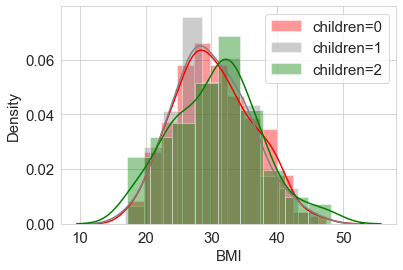

In [210]:
#plot the histogram for data of BMI of female with no child, 1 child and 2 children
sns.distplot(child_bmi['bmi_child_0'],color='red',label='children=0')
sns.distplot(child_bmi['bmi_child_1'],color='gray',label='children=1')
sns.distplot(child_bmi['bmi_child_2'],color='green',label='children=2')
plt.legend(bbox_to_anchor=(1, 1), fontsize=15) #legend
plt.rc('xtick', labelsize=15) #size of x values
plt.rc('ytick', labelsize=15) #size of y values
plt.xlabel('BMI',size=15) #xlabel 
plt.ylabel('Density',size=15) #ylabel

plt.show()

In [211]:
child_bmi.mean() #calculating the mean values of the chil_bmi data frame

bmi_child_0    30.361522
bmi_child_1    30.052658
bmi_child_2    30.649790
dtype: float64

In [212]:
child_bmi.var()

bmi_child_0    35.604304
bmi_child_1    33.487414
bmi_child_2    43.933034
dtype: float64

In [215]:
#  This is another way of extracting the mean bmi data of female customers with 0,1,2 children
# creating a data frame with number of children and mean bmi values of females in each case

data_female_child=data_female.groupby([data_female['children']]).mean(['bmi']).reset_index() #calculating the mean of bmi values of females for each category of children

data_female_child=data_female_child[['children','bmi']] #considering the data frame with only columns children and bmi
data_female_child_bmi=data_female_child.iloc[0:3,:] # considering only mean bmi values for female customers with children=0,1,2 (for female customers)
data_female_child_bmi

,children,bmi
0,0,30.361522
1,1,30.052658
2,2,30.649790


In [216]:
# We use ANOVA to analyse the hypothesis

import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('bmi~children', data = data_female_child_bmi).fit() #model is defined between bmi and children
aov_table = sm.stats.anova_lm(mod, typ=2) #anova table is created
print(aov_table)

            sum_sq   df         F    PR(>F)
children  0.041549  1.0  0.303711  0.679343
Residual  0.136805  1.0       NaN       NaN


### Conclusions on hypothesis testing
- Since p=0.68 >0.05, we fail to reject the null hypothesis. 
- Therefore, there is no enough evidence to say that BMI of female customers with no children, one child, and two children are different, within the level of significance alpha =0.05

## Conclusions

- Age: High number of customers who claimed the insurance belong to age of 20. 75% of the customers were below 50
- BMI: Ideal BMI is between 18.5 to 24.9. Therefore, most of the customers that claimed the insurance bill are beyond the ideal BMI
- Charges: 75% of the customers claimed less than 16500 bill,  very few customers claimed more charges
- Children: Highest count for '0'. Therefore, most of the customers claimed for single person 
- Sex: Slightly more male customers claim insurance bills compared to females
- Smoker: Significantly more non-smokers (79.52%) claim insurance bills than smokers (20.48%)
- Region: Among the four different regions, highest: southeast region (27.20%) and least: northeast (24.22%)
- Smokers vs non-smokers:
    - Most of the smokers: age group 28-50, while most of the non-smokers: age group 27-52
    - Most of the smokers: charges different-claim 22000-40000, while most of the non-smokers: 5000-11000
    -  Across regions: Charges claimed by smokers are different. Not so evidently different in the case of non-smokers 
    -   Both smokers and non-smokers below age group of 30 did not claim for dependents/children
    -   As age increased, charges increased for both smokers and non-smokers. However, more charges are claimed by smokers
- Regions:
    - Charges depend on the regions. Charges claimed by males from southeast are higher than claims from other regions. 
    - BMI varies across region, customers from southeast has highest BMI. May be this is the reason for the charges being higher in this region
- Female vs Male
    - Number and charges claimed by male customers > female customers and varies across regions
    - Not much difference in the BMI levels of male and female customers across different age values
    - As the number of dependents/children increases, the charges increases following a drastic reduction at 5 dependents. At this point, BMI is reduced drastically for male customers 
- Charges claimed by smokers are higher than non-smokers. BMI of smokers with 5 dependents is very low. 
- Lower BMI levels for customers with 5 dependents/children might have reduced their bills
- 
### Hypothesis testing conclusions: Within the level of significance α=0.05,
    - the charges claimed by smokers are greater than the charges claimed by non- smokers, within the level of significance
    - there is not enough evidence to say that BMI of female is different from male
    - there is no enough evidence to say that the proportion of smokers are different across different regions
    - there is no enough evidence to say that BMI of women with no children, one child, and two children are different


## Recommendations:
- For the company is it beneficial to increase premium from southeast region and implement more insurance schemes
- Charges claimed by customers with 2-4 children are higher than others. However, the count is lower than those with no child. Implementing new schemes for 2-4 children category would be beneficial
- It would be beneficial to implement higher premium schemes for smokers since their claims are more than non-smokers


